In [1]:
import numpy as np
import timeit
import argparse
import cv2
import matplotlib.pyplot as plt

In [2]:
class Node():
    def __init__(self, state, parent, move, cost): 

        self.state = state
        self.parent = parent
        self.move = move
        self.cost = cost
        
    def getState(self):
        return self.state
		
    def getParent(self):
        return self.parent
		
    def getMove(self):
	    return self.move
		
    def getCost(self):
        return self.cost

    def getFullPath(self):
        
        moves = []
        nodes = []
        current_node = self
        while(current_node.getMove() is not None):

            moves.append(current_node.getMove())
            nodes.append(current_node)
            current_node = current_node.getParent()

        nodes.append(current_node)
        moves.reverse()
        nodes.reverse()
        
        return moves, nodes

    def printStats(self):
        pass



In [3]:
def getBranches(node, step_size, space_size):

    moves = ["up", "down", "left", "right", "diagonal_right_up", "diagonal_right_down", "diagonal_left_up", "diagonal_left_down"]
    branches = []
    branches.append(Node(moveUp(node.getState(), step_size, space_size), node, moves[0], node.getCost() + 1))
    branches.append(Node(moveDown(node.getState(), step_size, space_size), node, moves[1], node.getCost() + 1))
    branches.append(Node(moveLeft(node.getState(), step_size, space_size), node, moves[2], node.getCost() + 1))
    branches.append(Node(moveRight(node.getState(), step_size, space_size), node, moves[3], node.getCost() + 1))

    branches.append(Node(moveDiagonalRightUp(node.getState(), step_size, space_size), node, moves[4], node.getCost() + np.sqrt(2)))
    branches.append(Node(moveDiagonalRightDown(node.getState(), step_size, space_size), node, moves[5], node.getCost() + np.sqrt(2)))
    branches.append(Node(moveDiagonalLeftUp(node.getState(), step_size, space_size), node, moves[6], node.getCost() + np.sqrt(2)))
    branches.append(Node(moveDiagonalLeftDown(node.getState(), step_size, space_size), node, moves[7], node.getCost() + np.sqrt(2)))

    #remove None nodes
    b = [branch for branch in branches if branch.getState() is not None]
            
    return b



In [4]:
def moveUp(state, step_size, space_size): #assuming we cat land on the borders

    size_x = space_size[1]
    size_y = space_size[0]

    current_position = state.copy()
    next_position = current_position.copy()
 
    if (current_position[1] < size_y - step_size) and check4Obstacle(current_position):
        next_position[1] = current_position[1] + step_size
        return next_position
    else:
        return None

def moveDown(state, step_size, grid_size):

    current_position = state.copy()
    next_position = current_position.copy()
 
    if (current_position[1] > 0 + step_size) and check4Obstacle(current_position):
        next_position[1] = current_position[1] - step_size
        return next_position
    else:
        return None

def moveRight(state, step_size, grid_size):

    size_x = space_size[1]
    size_y = space_size[0]

    current_position = state.copy()
    next_position = current_position.copy()
 
    if (current_position[0] < size_x - step_size) and check4Obstacle(current_position):
        next_position[0] = current_position[0] + step_size
        return next_position
    else:
        return None

def moveLeft(state, step_size, grid_size):
    current_position = state.copy()
    next_position = current_position.copy()
 
    if (current_position[0] > 0 + step_size) and check4Obstacle(current_position):
        next_position[0] = current_position[0] - step_size
        return next_position
    else:
        return None

def moveDiagonalRightUp(state, step_size, grid_size):

    size_x = space_size[1]
    size_y = space_size[0]

    current_position = state.copy()
    next_position = current_position.copy()
 
    if ((current_position[0] < size_x - step_size) and (current_position[1] < size_y - step_size)) and check4Obstacle(current_position):
        next_position[0] = current_position[0] + step_size
        next_position[1] = current_position[1] + step_size
        return next_position
    else:
        return None


def moveDiagonalRightDown(state, step_size, grid_size):
    size_x = space_size[1]
    size_y = space_size[0]

    current_position = state.copy()
    next_position = current_position.copy()
 
    if ((current_position[0] < size_x - step_size) and (current_position[1] > 0 + step_size)) and check4Obstacle(current_position):
        next_position[0] = current_position[0] + step_size
        next_position[1] = current_position[1] - step_size
        if next_position[1] < 0:
            print("right_down")
        return next_position
    else:
        return None

def moveDiagonalLeftUp(state, step_size, grid_size):
    size_x = space_size[1]
    size_y = space_size[0]

    current_position = state.copy()
    next_position = current_position.copy()
 
    if ((current_position[0] > 0 + step_size) and (current_position[1] < size_y - step_size)) and check4Obstacle(current_position):
        next_position[0] = current_position[0] - step_size
        next_position[1] = current_position[1] + step_size
        return next_position
    else:
        return None


def moveDiagonalLeftDown(state, step_size, grid_size):
    current_position = state.copy()
    next_position = current_position.copy()
 
    if ((current_position[0] > 0 + step_size) and (current_position[1] > 0 + step_size)) and check4Obstacle(current_position):
        next_position[0] = current_position[0] - step_size
        next_position[1] = current_position[1] - step_size
        return next_position
    else:
        return None

In [5]:
def bfsSearch(init_state, goal_state, grid_size):

    nodes = list()
    visited_states = list()

    init_node = Node(init_state, 0, None, 0)
    nodes.append(init_node)

    while(nodes):

        current_node = nodes.pop()
        visited_states.append(current_node.getState())

        
        #print("number of visited nodes: ", len(visited_states))

        if np.array_equal(current_node.getState(), goal_state):
            
            print("Goal Reached!")
            print("Total number of nodes explored:", len(visited_states))
            print("The cost of path: ", current_node.getCost())
            full_path, node_path = current_node.getFullPath()
            return full_path, node_path

        else:
            branches = getBranches(current_node, grid_size) 
            
            for branch in branches:
                branch_state = branch.getState()
                if branch_state not in visited_states:
                    nodes.insert(0, branch)
  

In [37]:
def check4Obstacle(state):

    #square 1 
    # offset_x = 90
    # offset_y = 40
    # size_x = 20
    # size_y = 20
    # if (state[0] >= offset_x) and (state[0] <= offset_x + size_x) and (state[1] >= offset_y) and (state[1] <= offset_y + size_y):
    #     return False
    # else:
    #     return True
    
    x, y = state
    #circle 1
    circle_diameter = 70
    circle_offset_x = 90
    circle_offset_y = 70
    circle_radius = int(circle_diameter/2)

    #ellipse
    ellipse_diameter_x = 160
    ellipse_diameter_y = 60
    ellipse_offset_x = 246
    ellipse_offset_y = 145
    ellipse_radius_x = int(ellipse_diameter_x/2)
    ellipse_radius_y = int(ellipse_diameter_y/2)

    #C shape
    c_offset_x = 200
    c_offset_y = sizey - 20
    c_length_x = 30
    c_length_y = 50
    c_width = 10
    c_height = 30

    if ((x - circle_offset_x)**2 + (y - circle_offset_y)**2 <= circle_radius**2): #circle
        return False
    
    elif ((x - ellipse_offset_x)/ellipse_radius_x) **2 + ((y - ellipse_offset_y)/ellipse_radius_y)**2 <= 1: #ellipse
        return False

    elif ((x - c_offset_x) >=0) and ((x - c_offset_x) <= c_length_x) and ((y - c_offset_y) <= 0) and ((c_offset_y - y) <= c_length_y): #c shape
        if ((x - c_offset_x) <= c_width) or ((c_offset_y - y) <= c_width) or ((c_offset_y - y) >= c_length_y - c_width):
            return False
        else:
            return True

    else:
        return True






In [38]:
def updateMap(space_map, state, color):
    X, Y, _ = space_map.shape
    transformed_y = state[0]
    transformed_x = X - state[1] - 1
    space_map[transformed_x, transformed_y, :] = color 
    return space_map


In [39]:
sizex = 400
sizey = 300
space_size = [sizey, sizex]
init_state = [250, 250]
goal_state = [350, 250]
step_size = 1

In [40]:
space_map = np.zeros([space_size[0], space_size[1], 3], dtype=np.uint8)
space_map = updateMap(space_map, init_state, [0,0,255])
space_map = updateMap(space_map, goal_state, [0,0,255])

In [41]:
#circle 1
diameter = 70
offset_x = 90
offset_y = 70
radius = int(diameter/2)

for i in range(offset_x - radius, offset_x + radius):
    for j in range(offset_y -radius, offset_y + radius):
        if (i - offset_x) **2 + (j - offset_y)**2 < radius**2:
            updateMap(space_map, [i, j], [255, 0, 0])

In [42]:
#ellipse
diameter_x = 160
diameter_y = 60
offset_x = 246
offset_y = 145
radius_x = int(diameter_x/2)
radius_y = int(diameter_y/2)

for i in range(offset_x - radius_x, offset_x + radius_x):
    for j in range(offset_y - radius_y, offset_y + radius_y):
        if ((i - offset_x)/radius_x) **2 + ((j - offset_y)/radius_y)**2 < 1:
            updateMap(space_map, [i, j], [255, 0, 0])


In [43]:
# C shape
offset_x = 200
offset_y = sizey - 20
length_x = 30
length_y = 50
width = 10
height = 30

for i in range(offset_x, offset_x + length_x):
    for j in range(offset_y - length_y, offset_y):
        if (i < (offset_x + width)):
            updateMap(space_map, [i, j], [255, 0, 0])
        if (j > offset_y - width) or (j < offset_y - height - width):
            updateMap(space_map, [i, j], [255, 0, 0])

In [44]:
# for i in range(90, 90+20+1):
#     for j in range(40, 40+20+1):
#         updateMap(space_map, [i,j], [255, 0, 0])


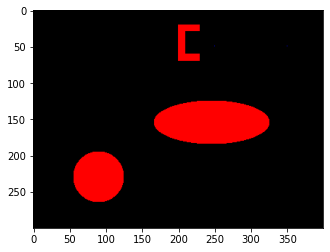

In [45]:
plt.imshow(space_map)

In [35]:
nodes = list()
visited_states = list()

init_node = Node(init_state, 0, None, 0)
nodes.append(init_node)

while(nodes):

    current_node = nodes.pop()
    visited_states.append(current_node.getState())
    space_map = updateMap(space_map, current_node.getState(), [0, 255, 0])
    cv2.imshow('frame',space_map)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # print(current_node.getState())
    # print("visited_states = ", visited_states)
    

    if np.array_equal(current_node.getState(), goal_state):
        
        print("Goal Reached!")
        print("Total number of nodes explored:", len(visited_states))
        print("The cost of path: ", current_node.getCost())
        full_path, node_path = current_node.getFullPath()


        #return full_path, node_path
        for node in node_path:
            pos = node.getState()
            space_map = updateMap(space_map, pos, [0, 0, 255])
            cv2.imshow('frame',space_map)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cv2.waitKey() 
        cv2.destroyAllWindows()

        break

    else:
        branches = getBranches(current_node, step_size, space_size) 
        
        for branch in branches:
            branch_state = branch.getState()
            if branch_state not in visited_states:
                # print("inserting ", branch_state)
                nodes.insert(0, branch)
                visited_states.append(branch_state)

KeyboardInterrupt: 

In [36]:
        cv2.destroyAllWindows()

In [78]:
        for node in node_path:
            pos = node.getState()
            space_map = updateMap(space_map, pos, [0, 0, 255])

In [88]:
cv2.imshow('frame',space_map)
cv2.waitKey() 
cv2.destroyAllWindows()